Założenia ogólne:
* płatność z dołu
* wpływ netto od klienta w wysokości $25
* oraz stopa dyskontowa 2%

1.  Pierwsza część zadania wymagała od nas zbudowania **prostego modelu retencji** i przy jego użyciu oszacowania: 
- stopy retencji
- średniego czasu do odejścia
- mediany czasu odejścia
- oraz oczekiwanej wartości CLV

In [82]:
import pandas as pd
import math
# wczytanie danych
data = pd.read_csv("telco_customers.csv")

In [83]:
data['customerID'].duplicated().any()

False

In [84]:
# oszacowanie stopy retencji

#sum_c = data[data["cancel"]==0]["tenure"].sum() 
#sum_t = data[data["cancel"]==1]["tenure"].sum()   


sum = data["tenure"].sum()   #zastąpiłem powyższe w tej lini bo jest prościej 

churned = data[data["cancel"]==1]["cancel"].count()


Zmienna **sum** zawiera sobie sumę wszystkich miesięcy. Są to miesiące w, których klient potencjalnie mógł zrezygnować z usługi.  
Zmienna **churned** jest równa ilości miesięcy w których klient faktycznie zrezygnował z usługi. 

In [85]:
retention_rate = 1 - (churned/sum)
print("Współczynnik retencji:", retention_rate)

Współczynnik retencji: 0.9773542699241194


Stopa retencji jest równa stosunkowi miesięcy w których klienci  mogli zrezygnować i tego nie zrobili do sumy wszystkich miesięcy korzystania z usługi.
W naszym przypadku wynosi **0.977** co jest wartością bardzo wysoką. 

In [86]:
# średni czas do odejścia
average_time_to_churn = 1/(1-retention_rate)
print("Średni czas do odejścia:", average_time_to_churn)

Średni czas do odejścia: 44.15843501840009


**Średni czas do odejścia** wynosi w naszym przypadku: 44.15 miesiąca. Czyli firma może oczekiwać 44 płatności od klientów.Co też oceniamy jako bardzo dobry wynik. (To prawie 4 lata).  
Jako ciekowostkę możemy poniżej zobaczyć, że bazując na danych a nie na stopie retencji (którą zakładamy jako stałą w czasie) średni czas odejścia wynosi 37,65 miesiąca. 

In [87]:
average_churn_time = data[data["cancel"]==1]["tenure"].mean()
print(average_churn_time)

37.65000968429208


In [88]:
# mediana czasu odejścia
median_time_to_churn = 1+(math.log(0.5)/math.log(retention_rate))
print("Mediana czasu do odejścia:", median_time_to_churn)

Mediana czasu do odejścia: 31.26039804501291


Jak możemy zaobserwować wyżej co najmniej połowa klientów dotrwa do okresu 31.

In [89]:
# Obliczanie CLV
net_income = 25 
discount_rate = 0.02 
r = retention_rate 
clv = net_income / (1 + discount_rate - r) #Syliwa miała + r, ale wtedy wychodzi bardzo mała wartośc + na slajdach jest wzór z  +  (slajd 20)
clv

586.2251614761173

**CLV** wynosi 586$. To całkiem pokaźna kwota. Jej znajomość, może pomóc firmie w podejmowaniu decyzji np. co do maksymalnych nakładów, które można przeznaczyć na pozyskiwanie nowych klientów. 

2. Część druga polegała na zbudowaniu **uogólnionego modelu retencji** i oszacowaniu tych samych wartości co w części pierwsza, czyli:

 * stopy retencji
 * średniego czasu do odejścia
 * mediany czasu odejścia
 * oraz oczekiwanej wartości CLV
 
 Należy również krótko porównać wyniki do prostego modelu retencji.


In [90]:
import pandas as pd
from lifelines import KaplanMeierFitter

data = pd.read_csv("telco_customers.csv")


data = data.sort_values("tenure")

# Tworzenie modelu Kaplan-Meiera
kmf = KaplanMeierFitter()


kmf.fit(data["tenure"], event_observed=data["cancel"])



retention_rate = kmf.survival_function_
retention_rate

,KM_estimate
timeline,
0.0,1.000000
1.0,0.966866
2.0,0.949544
3.0,0.933260
4.0,0.918748
...,...
68.0,0.171555
69.0,0.151548
70.0,0.126406


Powyżej możemy zobaczyć **stopę retencji** dla każdego przedziału czasowego.  
Najwyższa wartość **tenure** wynosi 72. (Z tego możemy wywnioskować, że badany okres czasu to 6 lat. )  
Wynika z tego również, że mamy 72 przedziały czasowe i dla każdego z nich osobną stopę retencji.

<AxesSubplot:xlabel='timeline'>

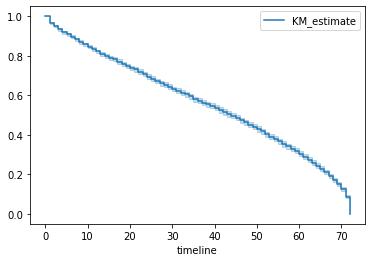

In [91]:
# Wyświetlanie stopy retencji
kmf.plot()

Na powyższym wykresie możemy zobaczyć jak kształtuje się stopa retencji w poszczególnych przedziałach czasowych. 

In [92]:
kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,44.0
1.0,45.0
2.0,44.0
3.0,44.0
4.0,44.0
...,...
68.0,4.0
69.0,3.0
70.0,2.0


In [116]:
average_time_to_cancel = kmf.median_survival_time_
print(average_time_to_cancel)

44.0


Możemy zauważyć, że mediana czasu odejścia wynosi 44 miesiące i jest większa niż w prostym modelu retencji. 

In [134]:
retention_rate = kmf.survival_function_
retention_rate

,KM_estimate
timeline,
0.0,1.000000
1.0,0.966866
2.0,0.949544
3.0,0.933260
4.0,0.918748
...,...
68.0,0.171555
69.0,0.151548
70.0,0.126406


In [180]:
#for i in retention_rate["KM_estimate"]:

1.0
0.9668657565415261
0.9495438120015233
0.9332597731611794
0.918748293658758
0.9078277713051909
0.8966239729992385
0.8837275476414636
0.8705472988182349
0.8585748133597321
0.8468271140441527
0.8354759916796736
0.8222064694957774
0.8101873920129286
0.8013142360768148
0.7906803570877817
0.7816894586472476
0.7710767150511015
0.7583012724276937
0.7487983091621806
0.7394294917906999
0.7312629235740438
0.7200319230413365
0.7071101138541538
0.6943255918058608
0.6841815184583186
0.6725172624164076
0.6617203866388386
0.6534557689872291
0.6429518268461487
0.6325876062637122
0.6234762621405728
0.614134394263129
0.6047382132003523
0.5947347408846152
0.5809037003989266
0.5732877882337488
0.5637361756340529
0.5549037968604952
0.5468030115048675
0.5369175263624544
0.5260116934004314
0.5160278465960316
0.506187498644162
0.4972792321447538
0.4863652825166763
0.4740320933485639
0.46323591745618825
0.45217296675706076
0.44187335920698934
0.4300792244467475
0.41782043420123444
0.4030521125210732
0.39151

In [188]:
from math import pow

def calculate_clv(retention_rate, monthly_fee, discount_rate):
    return monthly_fee * (1 - pow(retention_rate,1/(1+discount_rate))) / discount_rate

monthly_fee = 25
discount_rate = 0.02


#tutaj trzeba poprawić wzór na CLV

In [187]:
for retention_rate in retention_rate["KM_estimate"]:
    clv = calculate_clv(retention_rate, monthly_fee, discount_rate)
    print("Retention rate: ", retention_rate, "CLV: ", clv)

Retention rate:  1.0 CLV:  0.0
Retention rate:  0.9668657565415261 CLV:  40.61903216876425
Retention rate:  0.9495438120015233 CLV:  61.86468914778877
Retention rate:  0.9332597731611794 CLV:  81.84426638143185
Retention rate:  0.918748293658758 CLV:  99.65477296510205
Retention rate:  0.9078277713051909 CLV:  113.06159059691372
Retention rate:  0.8966239729992385 CLV:  126.81946530371997
Retention rate:  0.8837275476414636 CLV:  142.66000365647082
Retention rate:  0.8705472988182349 CLV:  158.85384398698935
Retention rate:  0.8585748133597321 CLV:  173.56793809835722
Retention rate:  0.8468271140441527 CLV:  188.00968263727958
Retention rate:  0.8354759916796736 CLV:  201.96763675538674
Retention rate:  0.8222064694957774 CLV:  218.28927770583468
Retention rate:  0.8101873920129286 CLV:  233.07731595725437
Retention rate:  0.8013142360768148 CLV:  243.99743065361744
Retention rate:  0.7906803570877817 CLV:  257.08757783358584
Retention rate:  0.7816894586472476 CLV:  268.1579320152366

In [ ]:
from math import pow

def calculate_clv(retention_rate, monthly_fee, discount_rate):
    return monthly_fee * (1 - pow(retention_rate,1/(1+discount_rate))) / discount_rate

monthly_fee = 25
discount_rate = 0.02

#clv = calculate_clv(retention_rate, monthly_fee, discount_rate)

#print("CLV: ", clv)

 **3. Budowa uogólnionego modelu retencji ze zmienną grupującą**:

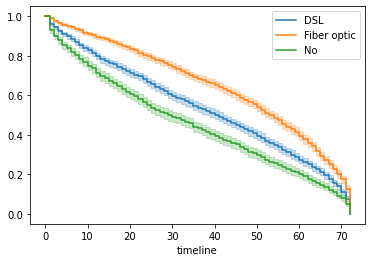

In [190]:
from lifelines import KaplanMeierFitter

df = pd.read_csv("telco_customers.csv")
# fit the model to data
kmf = KaplanMeierFitter()

for group, data in df.groupby('InternetService'):
    T = data['tenure']
    E = data['cancel']
    kmf.fit(T, event_observed=E, label=group)
    kmf.plot()

Wyżej możemy zaobserwować jak różni się stopa retencji w zależności od wartości zmiennej **InternetService** 
Na powyższym wykresie można łatwo zauważyć, że najszybiciej stopa retencji maleje dla klientów u, których zmienna **InternetService**  ma wartość **"No"**.  
Najwolniej maleje dla klientów z wartością **"Fiber Optic"**  
Możemy postawić hipotezę, że klienci mający Internet Światłowodowy (Fiber Optic) są najbardziej zadowolenii z usługi, dlatego są najbardziej wierni firmie. 